# Computational alloy design and discovery using Machine Learning
### Submitted by : Yadu Krishna Choyi
### Uid : u6728671

In [415]:
import seaborn as sns
from sklearn import metrics
from IPython.display import clear_output
import xgboost as xgb
from sklearn.ensemble import IsolationForest
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import torch
import os
from sklearn.preprocessing import MinMaxScaler
from torch import nn, optim
import torch.nn.functional as F
import random
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from itertools import combinations
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm
from math import pi
from sklearn.metrics import r2_score

# Comparing different ML models

LR : Mean r2:  0.04407505163817299  Std:  0.11983877836797985
KNN : Mean r2:  0.5377696609737319  Std:  0.14384706725133578
DTR : Mean r2:  0.611963536226364  Std:  0.22853681662369177
SVM : Mean r2:  0.4211653562652649  Std:  0.11405707958610098



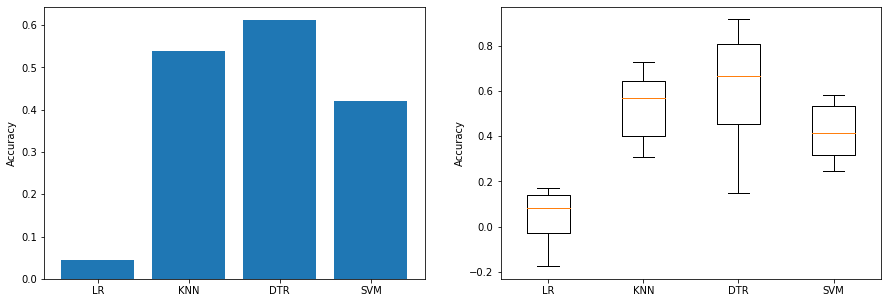

In [418]:
# Compare Algorithms
# load dataset
dataset = pd.read_excel("MasterSpreadSheet_FIN.xlsx")
X = dataset[['Sensitisation Time (days)','Sensitisation Temperature (Celcius)',
       'Recrystallised (0 = no, 1 =yes)',
       'Temper notation for ML', 'Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce']]

y = dataset[['DoS (mg/cm^2)']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)
y_train = np.array(y_train).flatten('F')
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor(n_neighbors=5)))
models.append(('DTR', DecisionTreeRegressor(criterion='mse')))
models.append(('SVM', SVR(kernel='rbf',C=50,epsilon=5,gamma='auto')))
# evaluate each model in turn
results = []
r_mean = []
r_std = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    r_mean.append(cv_results.mean())
    r_std.append(cv_results.std())
    names.append(name)
    print(name,":",'Mean r2: ',cv_results.mean(),' Std: ',cv_results.std())
# bar graph and boxplot algorithm comparison
fig,ax = plt.subplots(1,2,figsize = (15,5))
y_pos = np.arange(4)
ax[0].bar(y_pos,r_mean)
ax[0].set_ylabel('Accuracy')
ax[0].set_xticks(y_pos)
ax[0].set_xticklabels(names)

ax[1].boxplot(results)
ax[1].set_xticklabels(names)
ax[1].set_ylabel('Accuracy')
print()
#plt.savefig('ml_accs_xgb.jpg')

# Comparing variation of accuracy by varying n for KNN regression

KNN2 : Mean r2:  0.40229779871735516  Std:  0.19573204152982251
KNN4 : Mean r2:  0.5282111649926781  Std:  0.15395780330816208
KNN6 : Mean r2:  0.5259895098895748  Std:  0.12765381016818045
KNN8 : Mean r2:  0.5454459862567516  Std:  0.11536537893527904
KNN10 : Mean r2:  0.5272235110884528  Std:  0.10077148772460315
KNN12 : Mean r2:  0.5136485921421297  Std:  0.098805343515898
KNN14 : Mean r2:  0.5136485921421297  Std:  0.098805343515898
KNN16 : Mean r2:  0.5136485921421297  Std:  0.098805343515898
[0 1 2 3 4 5 6 7]



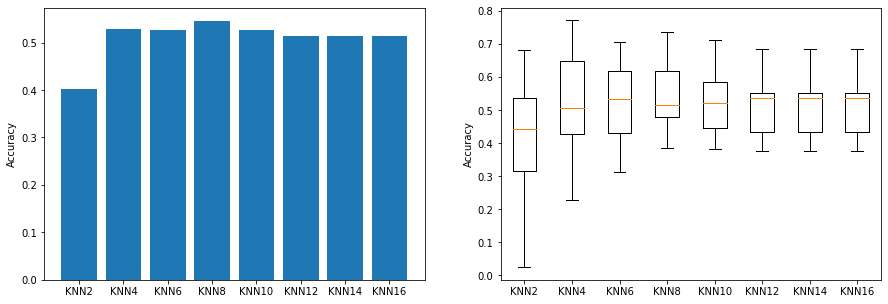

In [108]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN2', KNeighborsRegressor(n_neighbors=2)))
models.append(('KNN4', KNeighborsRegressor(n_neighbors=4)))
models.append(('KNN6', KNeighborsRegressor(n_neighbors=6)))
models.append(('KNN8', KNeighborsRegressor(n_neighbors=8)))
models.append(('KNN10', KNeighborsRegressor(n_neighbors=10)))
models.append(('KNN12', KNeighborsRegressor(n_neighbors=12)))
models.append(('KNN14', KNeighborsRegressor(n_neighbors=12)))
models.append(('KNN16', KNeighborsRegressor(n_neighbors=12)))
# evaluate each model in turn
results = []
r_mean = []
r_std = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    r_mean.append(cv_results.mean())
    r_std.append(cv_results.std())
    names.append(name)
    print(name,":",'Mean r2: ',cv_results.mean(),' Std: ',cv_results.std())
# boxplot algorithm comparison
fig,ax = plt.subplots(1,2,figsize = (15,5))
y_pos = np.arange(len(results))
print(y_pos)
ax[0].bar(y_pos,r_mean)
ax[0].set_ylabel('Accuracy')
ax[0].set_xticks(y_pos)
ax[0].set_xticklabels(names)

ax[1].boxplot(results)
ax[1].set_xticklabels(names)
ax[1].set_ylabel('Accuracy')
print()
#plt.savefig('knn_acc.jpg')

# Comparison of variation of accuracy by varying epsilon for SVR

SVM1 : Mean r2:  0.0761715945491468  Std:  0.04020279527316311
SVM2 : Mean r2:  0.07672345626564772  Std:  0.03983765639915335
SVM3 : Mean r2:  0.07664121890168342  Std:  0.040316184817530056
SVM4 : Mean r2:  0.07697226044646986  Std:  0.0404542883827223
SVM5 : Mean r2:  0.07723515488680448  Std:  0.04006932641760593
SVM6 : Mean r2:  0.07781667792504485  Std:  0.03982141109834709
SVM7 : Mean r2:  0.07815768265964737  Std:  0.04005619190100262
SVM8 : Mean r2:  0.07748699380676322  Std:  0.040939698994944
SVM9 : Mean r2:  0.07744367799281344  Std:  0.041287083793196164



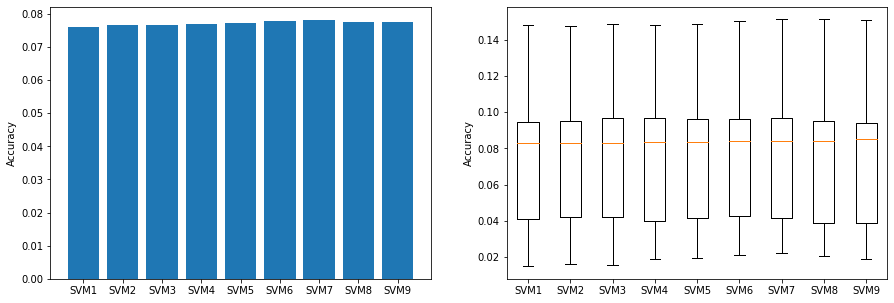

In [109]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('SVM1', SVR(epsilon = 0.1)))
models.append(('SVM2', SVR(epsilon = 0.2)))
models.append(('SVM3', SVR(epsilon = 0.3)))
models.append(('SVM4', SVR(epsilon = 0.4)))
models.append(('SVM5', SVR(epsilon = 0.5)))
models.append(('SVM6', SVR(epsilon = 0.6)))
models.append(('SVM7', SVR(epsilon = 0.7)))
models.append(('SVM8', SVR(epsilon = 0.8)))
models.append(('SVM9', SVR(epsilon = 0.9)))

# evaluate each model in turn
results = []
r_mean = []
r_std = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    r_mean.append(cv_results.mean())
    r_std.append(cv_results.std())
    names.append(name)
    print(name,":",'Mean r2: ',cv_results.mean(),' Std: ',cv_results.std())
# boxplot algorithm comparison
fig,ax = plt.subplots(1,2,figsize = (15,5))
y_pos = np.arange(len(results))
ax[0].bar(y_pos,r_mean)
ax[0].set_ylabel('Accuracy')
ax[0].set_xticks(y_pos)
ax[0].set_xticklabels(names)

ax[1].boxplot(results)
ax[1].set_xticklabels(names)
ax[1].set_ylabel('Accuracy')
print()
#plt.savefig('knn_acc.jpg')

# Visualizing pair reltionship between Al, Mg and DoS

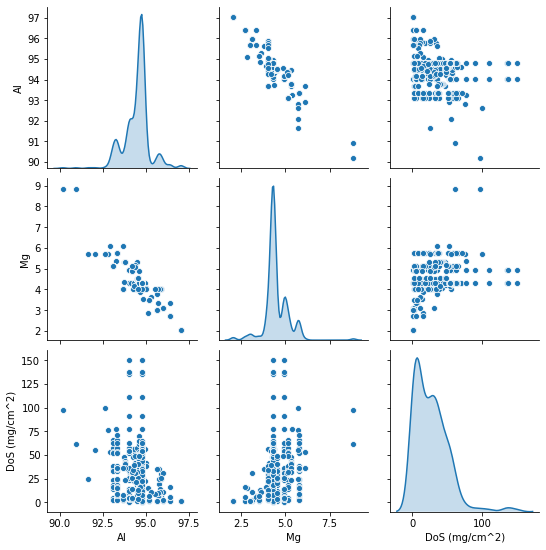

In [110]:
pairplot = dataset[['Al','Mg','DoS (mg/cm^2)']]
sns.pairplot(pairplot, diag_kind="kde")

## Corelation of constituent elements with DoS

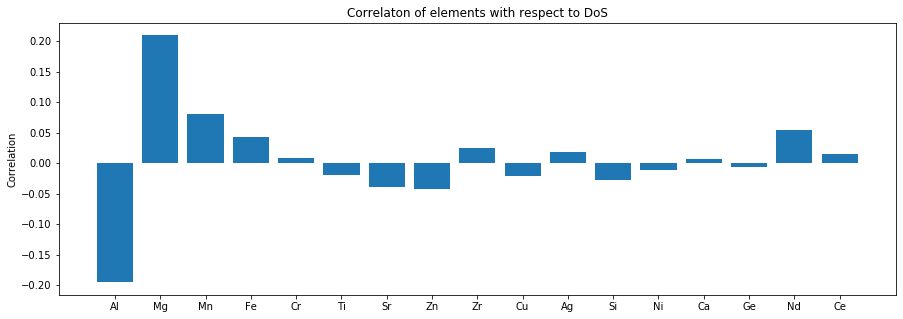

In [388]:
corr = dataset[['Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce','DoS (mg/cm^2)']].corr()
fig,ax = plt.subplots(figsize = (15,5))
y_pos = ['Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce']
ax.bar(y_pos,corr.iloc[-1,:-1])
ax.set_title('Correlaton of elements with respect to DoS')
ax.set_ylabel('Correlation')
ax.set_xticks(y_pos)
ax.set_xticklabels(y_pos)
#plt.savefig('Corr.jpg')
print()

# Running Xgboost and evaluating the model

In [274]:
m = xgb.XGBRegressor(max_depth = 6,n_estimators=1000,colsample_bytree=0.8)#Build model
m.fit(X_train,y_train)#fit model
pred_x=m.predict(X_test)#predict output of test set
xg_o = metrics.r2_score(y_test,pred_x)
print('R2 score of an Xgboost model trained on data without removing outliers')
print('R2 score := ',xg_o)

R2 score of an Xgboost model trained on data without removing outliers
R2 score :=  0.8639048547004196


In [416]:
# Removing outliers
x_out = dataset[['Sensitisation Time (days)','Sensitisation Temperature (Celcius)',
       'Recrystallised (0 = no, 1 =yes)',
       'Temper notation for ML', 'Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce','DoS (mg/cm^2)']]
clf = IsolationForest(max_samples=100, random_state=20)
clf.fit(x_out)
y_pred_out = clf.predict(x_out)
x_out['outlier'] = y_pred_out
x_out = x_out[x_out['outlier'] == 1]

XX = x_out[['Sensitisation Time (days)','Sensitisation Temperature (Celcius)',
       'Recrystallised (0 = no, 1 =yes)',
       'Temper notation for ML', 'Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce']]

yy = x_out[['DoS (mg/cm^2)']]

XX_train, XX_test, yy_train, yy_test = train_test_split(
    XX, yy, test_size=0.10, random_state=42)

m1 = xgb.XGBRegressor(max_depth = 6,n_estimators=1000,colsample_bytree=0.8)
m1.fit(XX_train,yy_train)
pred_x=m1.predict(XX_test)
xg_no = metrics.r2_score(yy_test,pred_x)
mse = mean_squared_error(yy_test,pred_x)
print('R2 score of an Xgboost model trained on data after removing outliers')
print('R2 score = ',xg_no)
print('Mean squared error = ', mse)

R2 score of an Xgboost model trained on data after removing outliers
R2 score =  0.887895153803987
Mean squared error =  84.20386113038985


## Comparison of performance before and after removing outliers

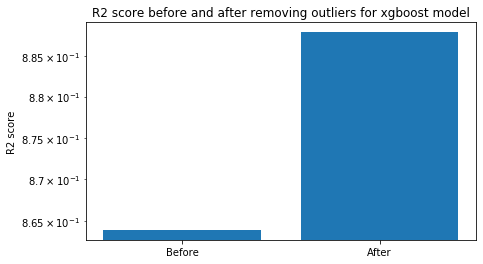

In [403]:
fig,ax=plt.subplots(figsize = (7,4))
ax.bar(np.arange(2),[xg_o,xg_no])
ax.set_title('R2 score before and after removing outliers for xgboost model')
ax.set_ylabel('R2 score')
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Before','After'])
ax.set_yscale('log')
plt.savefig('xg_acc.jpg')
print()

## Visualizing actual and predicted output

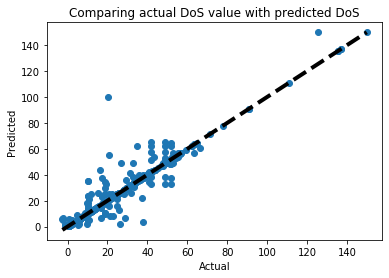

In [353]:
fig, ax = plt.subplots()
pl_x = m1.predict(X_train)
ax.scatter(pl_x, y_train)
ax.plot([pl_x.min(), pl_x.max()], [pl_x.min(), pl_x.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Comparing actual DoS value with predicted DoS')
#plt.savefig('pred_vs_act.jpg')
plt.show()

# Testing performance of Neural Network model tuned using custom Genetic Algorithm

### (Note: Running the following genetic alorithm with the current settings takes approximately 2-3 hours)

In [ ]:
dataset = pd.read_excel("MasterSpreadSheet_FIN.xlsx")
X = dataset[['Sensitisation Time (days)','Sensitisation Temperature (Celcius)',
       'Recrystallised (0 = no, 1 =yes)',
       'Temper notation for ML', 'Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce']]
y = dataset[['DoS (mg/cm^2)']]

# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Normalizing the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)

# Converting data to tensors
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test =torch.tensor(y_test.values, dtype=torch.float)

# Initialising the number of input neurons and output neurons as these parameters are fixed.
input_neurons = 21
output_neurons = 1

# Defining the network architecture
class reg(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(classifier, self).__init__()
        # Number of input features is 20.
        self.layer_1 = nn.Linear(n_input, n_hidden) 
        self.layer_out = nn.Linear(n_hidden, n_output)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, inputs):
        h = self.activation(self.layer_1(inputs))
        y_out = self.layer_out(h)
        # The output from the first hidden layer is returned for network reduction
        return y_out, h

# Function to train the network

def train(input_neurons, hidden_neurons, output_neurons, learning_rate, num_epoch ):
    
    # build the model
    net = reg(input_neurons,hidden_neurons,output_neurons)

    # define loss functions
    loss_func = torch.nn.MSELoss()

    # define optimiser
    optimiser = optim.Adam(net.parameters(), lr=learning_rate)

    # store all losses for visualisation
    all_losses = []

    # train a neural network
    for epoch in range(num_epoch):
        Y_pred,h = net(X_train)

        # Compute loss
        loss = loss_func(Y_pred, y_train)
        all_losses.append(loss.item())

        # Clear the gradients before running the backward pass.
        net.zero_grad()

        # Perform backward pass: compute gradients of the loss
        loss.backward()

        # Calling the step function on an Optimiser makes an update to its parameter
        optimiser.step()
    
    return net,h

def test(net):
    Y_pred_test,h = net(X_test)
    acc = 100*(r2_score(y_test.detach().numpy(), Y_pred_test.detach().numpy()))
    return acc,net

# This function returns a list with size equal to the population. The list contains randomly initialized
# hyperparameters for all network in the population. This function is called at the start of the algorithm
# to define the initial population with random hyperparmeters
def individuals(pop_size):
    pop = []
    for i in range(pop_size):
        learning_rate = random.uniform(0.01,0.9)
        learning_rate = float("{0:.3f}".format(learning_rate))
        hidden_neurons = np.random.randint(10,300)
        num_epoch = np.random.randint(10,500)
        pop.append((learning_rate, hidden_neurons, num_epoch))
        
    return pop

# Function to calculate the fitness of an individual in the population
# Fitness is determined by the accuracy of the network model
# Higher the accuracy of a model, greater is the fitness
def fitness(individual, lr, hn, ne):

    for pop in individual: 
        network,h = train(input_neurons, hn, output_neurons, lr, ne)
        fitness_score,net = test(network)
    
    return fitness_score,net,h

# Function to calculate the fitness of all members in the populaton. This function returns the fitness score
# along with the models hyperparameters
def fitness_all(pop):
    fitness_list = []
    net_list = []
    h_list = []
    for individual in pop:
        lr = individual[0]
        hn = individual[1]
        ne = individual[2]
        score,net,h = fitness(individual, lr, hn, ne)
        h_list.append(h)
        net_list.append(net)
        fitness_list.append((individual, score))
        
    return fitness_list,net_list,h_list

# Function to convert decimal number to binary for the purpose of applying mutation
def decimalToBinary(num, k_prec) : 
    binary = ""  
    Integral = int(num) 
    fractional = num - Integral  
    while (Integral) :    
        rem = Integral % 2
        binary += str(rem); 
        Integral //= 2
    binary = binary[ : : -1] 
    binary += '.'
    while (k_prec) : 
        fractional *= 2
        fract_bit = int(fractional) 
        if (fract_bit == 1) :           
            fractional -= fract_bit 
            binary += '1'         
        else : 
            binary += '0'
        k_prec -= 1     
    n = len(binary)
    reverse = binary[::-1]
    binary = '.' + reverse[0:n-1]
    return binary 

# Function to convert binary number to decimal
def bin2float (b):
    s, f = b.find('.')+1, int(b.replace('.',''), 2)
    return f/2.**(len(b)-s) if s else f

# This function takes in two individuals as parents and returns a child
def cross_over(parent1, parent2):

    # performing mutation
    A = decimalToBinary(parent1[0], 8) # converting hyperparameters to binary represenation
    B = decimalToBinary(parent2[0], 8) # converting hyperparameters to binary represenation
    # performing mutation
    C = A[0] + A[1] + B[2] + A[3] + B[4] + A[5] + B[6] + A[7] + B[8]
    C = bin2float(C)
    # converting format
    C_norm =0 + (0.05 - 0)*C 
    C = float("{0:.3f}".format(C_norm))
    X = format(parent1[1], '08b')
    Y = format(parent2[1], '08b')
    Z = ''
    for i in range(0, 8):
        if i < 4:
            Z += X[i]
        else:
            Z += Y[i]
    Z = bin2float(Z)
    P = format(parent1[2], '010b')
    Q = format(parent2[2], '010b')
    R = ''
    for i in range(0, 10):
        if i < 5:
            R += P[i]
        else:
            R += Q[i]
    R = bin2float(R)     
    child = (C, Z, R)
    return child

# This function selects a parent from the current generation's population
def select_parent(prob):
    parent = ()
    x = float("{0:.2f}".format(random.uniform(0,1)))
    for i in prob:
        if (x < i[1]):
            parent = i[0]
    return parent

# This function takes in hyperparameters and the Accuracy for a individuals in the population and returns the new generation
def cross_over_pop(fitness_list,pop_size): 
    prob = []
    prob_each = 0
    tot_fitness = 0
    for individuals in fitness_list:
        tot_fitness += individuals[1]
        
    for individuals in fitness_list: 
        prob_each += individuals[1]/tot_fitness
        prob.append((individuals[0], float("{0:.2f}".format(prob_each))))
       
    next_gen = []
    n = pop_size 
    parent1 = 0.0
    parent2 = 0.0

    while(n > 0):
        
        x = float("{0:.2f}".format(random.uniform(0,1)))
        for i in prob:
            if (x < i[1]):
                parent1 = i[0]
                break
            
        y = float("{0:.2f}".format(random.uniform(0,1)))
        for j in prob:
            if (y < j[1]):
                parent2 = j[0]
                break
                      
        child = cross_over(parent1, parent2)
        if np.random.rand() < mutation_rate:
            child = mutation(child)         
        next_gen.append(child)
        n -= 1
        
    return next_gen

#The method applies the mutation operator over the child
def mutation(child):
    lr_mut = child[0]
    lr_mut = (lr_mut*random.uniform(0,0.05))/random.uniform(0,0.05)
    lr_mut_norm = 0 + (0.05 - 0)*lr_mut
    lr_mut = float("{0:.3f}".format(lr_mut))
    hi_mut = random.randint(1,20)
    hi_mut = hi_mut+child[1]
    ep_mut = random.randint(1,20)
    ep_mut = ep_mut+child[2]
    new_child = (lr_mut, hi_mut, ep_mut)
    return child

# Function to train the genetic algorithm
def GA(pop_size, mutation_rate, num_generations):
    
    LIST = []     #list to store the best individual from each generation
    net_list = []
    pattern_vec_list = []
    lr_list = []
    hn_list = []
    ne_list = []
    acc_list = []
    initial_pop = individuals(pop_size)
    fitness_list,net,_ = fitness_all(initial_pop)
    while(num_generations > 0):
        print('Generation = ', num_generations)
        new_gen = cross_over_pop(fitness_list,pop_size)
        fitness_list,net,h = fitness_all(new_gen)
        index = 0
        acc = 0
        count = 0
        for i in fitness_list:
            if i[1] > acc:
                acc = i[1]
                index = i[0]
                count += 1
        pattern_vec_list.append(h)
        net_list.append(net)   
        LIST.append((index, float("{0:.2f}".format(acc))))
        num_generations -= 1
        attrib = (index, float("{0:.2f}".format(acc)))
        print("Current generation best network accuracy = ",acc)
        print('Learning Rate =', attrib[0][0])
        print('Number of hidden neurons =', attrib[0][1])
        print('Number of epochs =', attrib[0][2])
        print()
        lr_list.append(attrib[0][0])
        hn_list.append(attrib[0][1])
        ne_list.append(attrib[0][2])
        acc_list.append(acc)

    return lr_list,hn_list,ne_list,acc_list

    acc,_ = test(net)

# Defining GA settings. The following hyperparameters will be tuned using genetic algorithm
pop_size = 100 # The size of the population
mutation_rate = 0.1 # The rate of mutation
num_generations = 100 # The number of generations

lr,hn,ne,acc = GA(pop_size, mutation_rate, num_generations)

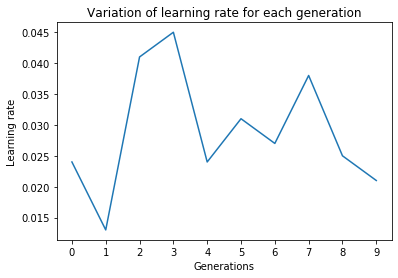

In [216]:
fig,ax = plt.subplots()
ax.plot(lr)
ax.set_title('Variation of learning rate for each generation')
ax.set_xlabel('Generations')
ax.set_ylabel('Learning rate')
ax.set_xticks(np.arange(len(lr)))
plt.savefig('gaLr.jpg')
print()

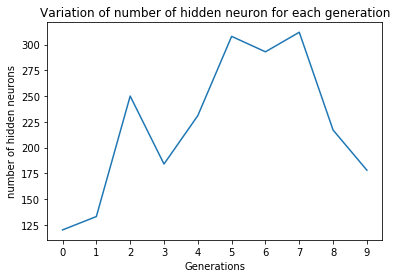

In [210]:
fig,ax = plt.subplots()
ax.plot(hn)
ax.set_title('Variation of number of hidden neuron for each generation')
ax.set_xlabel('Generations')
ax.set_ylabel('number of hidden neurons')
ax.set_xticks(np.arange(len(hn)))
#plt.savefig('gaHn.jpg')
print()

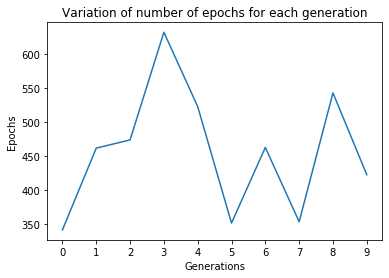

In [213]:
fig,ax = plt.subplots()
ax.plot(ne)
ax.set_title('Variation of number of epochs for each generation')
ax.set_xlabel('Generations')
ax.set_ylabel('Epochs')
ax.set_xticks(np.arange(len(ne)))
#plt.savefig('gaEp.jpg')
print()

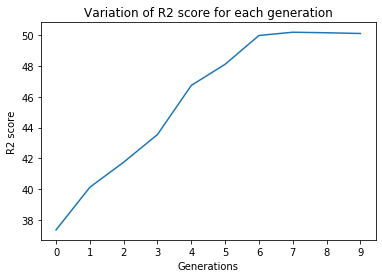

In [203]:
fig,ax = plt.subplots()
ax.plot(acc)
ax.set_title('Variation of R2 score for each generation')
ax.set_xlabel('Generations')
ax.set_ylabel('R2 score')
ax.set_xticks(np.arange(len(acc)))
#plt.savefig('gaR2.jpg')
print()

# Data Generators
## Random data generator

In [220]:
temp_list = [0,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300]
recrystallised_list = [0,1]

sens_days = [random.randint(0, 60) for x in range(0, 1000)]
sens_temp = random.choices(temp_list, k = 1000)
recrystallised = random.choices(recrystallised_list, k = 1000)

In [420]:
sens_days = 7
sens_temp = 150
recr = 1
t = pd.DataFrame(columns = c_)
temper_list = [1,2,3,4,5,6,7]
min_dos = float('inf')
min_temper = 0
composition = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
negative_counter = 0
c_ = ['Sensitisation Time (days)','Sensitisation Temperature (Celcius)',
       'Recrystallised (0 = no, 1 =yes)',
       'Temper notation for ML', 'Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce']
for i in range(100000):
    if i % 10000 == 0:
        print("Progress : ",i,'/100000',flush=True)
    temper = random.choices(temper_list)
    al = random.uniform(90,96)
    rnge = 100.0 - al
    rnd = [random.uniform(0, rnge) for x in range(0, 16)]
    rnd.sort()
    x1 = rnd[0]
    x2 = rnd[1] - rnd[0]
    x3 = rnd[2] - rnd[1]
    x4 = rnd[3] - rnd[2]
    x5 = rnd[4] - rnd[3]
    x6 = rnd[5] - rnd[4]
    x7 = rnd[6] - rnd[5]
    x8 = rnd[7] - rnd[6]
    x9 = rnd[8] - rnd[7]
    x10 = rnd[9] - rnd[8]
    x11 = rnd[10] - rnd[9]
    x12 = rnd[11] - rnd[10]
    x13 = rnd[12] - rnd[11]
    x14 = rnd[13] - rnd[12]
    x15 = rnd[14] - rnd[13]
    x16 = rnge - rnd[14]
    generated_composition = [[sens_days,sens_temp,recr,temper[0],al,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16]]
    if al+x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16 != 100.0:
        continue
    else:
        generated_composition = pd.DataFrame(generated_composition,columns = c_ )
        t = pd.concat([t,generated_composition])
        dos = m1.predict(generated_composition)
        if dos[0] < min_dos and dos[0]>=0:
            best_comp = generated_composition
            min_dos = dos[0]
        #print(dos)
        if dos[0] < 0:
            negative_counter = negative_counter + 1
print('Best composition using random data generator')        
print('Dos = ', min_dos)
t.columns = np.arange(21)      
best_comp

Progress :  0 /100000
Progress :  10000 /100000
Progress :  20000 /100000
Progress :  30000 /100000
Progress :  40000 /100000
Progress :  50000 /100000
Progress :  60000 /100000
Progress :  70000 /100000
Progress :  80000 /100000
Progress :  90000 /100000
Best composition using random data generator
Dos =  0.029167771


,Sensitisation Time (days),Sensitisation Temperature (Celcius),"Recrystallised (0 = no, 1 =yes)",Temper notation for ML,Al,Mg,Mn,Fe,Cr,Ti,...,Zn,Zr,Cu,Ag,Si,Ni,Ca,Ge,Nd,Ce
0,7,150,1,1,95.783746,0.190031,0.010967,0.011888,0.007243,0.46135,...,0.481294,0.535775,0.093645,0.158146,0.06905,0.244724,0.041281,0.781349,0.271565,0.697049


## Data generation using SMOTE

In [352]:
from random import choice
def SMOTE(T, N, k):
# """
# Returns (N/100) * n_minority_samples synthetic minority samples.
#
# Parameters
# ----------
# T : array-like, shape = [n_minority_samples, n_features]
#     Holds the minority samples
# N : percetange of new synthetic samples:
#     n_synthetic_samples = N/100 * n_minority_samples. Can be < 100.
# k : int. Number of nearest neighbours.
#
# Returns
# -------
# S : array, shape = [(N/100) * n_minority_samples, n_features]
# """
    n_minority_samples, n_features = T.shape

    if N < 100:
       #create synthetic samples only for a subset of T.
       #TODO: select random minortiy samples
        N = 100
        pass

    if (N % 100) != 0:
        raise ValueError("N must be < 100 or multiple of 100")

    N = int(N/100)
    n_synthetic_samples = N * n_minority_samples
    n_synthetic_samples = int(n_synthetic_samples)
    n_features = int(n_features)
    S = np.zeros(shape=(n_synthetic_samples, n_features))

    #Learn nearest neighbours
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(T)

    #Calculate synthetic samples
    for i in range(n_minority_samples):
        nn = neigh.kneighbors(T[i].reshape(1,-1), return_distance=False)
        for n in range(N):
            nn_index = choice(nn[0])
            #NOTE: nn includes T[i], we don't want to select it
            while nn_index == i:
                nn_index = choice(nn[0])

            dif = T[nn_index] - T[i]
            gap = np.random.random()
            S[n + i * N, :] = T[i,:] + gap * dif[:]

    return S

X_g = dataset[['Sensitisation Time (days)','Sensitisation Temperature (Celcius)',
       'Recrystallised (0 = no, 1 =yes)',
       'Temper notation for ML', 'Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce']]
X_generator = dataset[[
       'Recrystallised (0 = no, 1 =yes)',
       'Temper notation for ML', 'Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce']]
X_generator = X_generator.iloc[:200,:]
df = X_generator.to_numpy()
new_data = SMOTE(df,1000000,10)
pd.DataFrame(new_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,95.87400,4.00,0.01,0.03,0.01,0.01,0.0,0.02,0.00500,0.01,0.0,0.03,0.001,0.0,0.0,0.0,0.0
1,0.0,1.0,95.79562,4.00,0.01,0.03,0.01,0.01,0.0,0.02,0.08338,0.01,0.0,0.03,0.001,0.0,0.0,0.0,0.0
2,0.0,1.0,95.87400,4.00,0.01,0.03,0.01,0.01,0.0,0.02,0.00500,0.01,0.0,0.03,0.001,0.0,0.0,0.0,0.0
3,0.0,1.0,95.87400,4.00,0.01,0.03,0.01,0.01,0.0,0.02,0.00500,0.01,0.0,0.03,0.001,0.0,0.0,0.0,0.0
4,0.0,1.0,95.87400,4.00,0.01,0.03,0.01,0.01,0.0,0.02,0.00500,0.01,0.0,0.03,0.001,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1.0,7.0,94.61400,4.32,0.60,0.21,0.05,0.02,0.0,0.03,0.00500,0.05,0.0,0.10,0.001,0.0,0.0,0.0,0.0
1999996,1.0,7.0,94.61400,4.32,0.60,0.21,0.05,0.02,0.0,0.03,0.00500,0.05,0.0,0.10,0.001,0.0,0.0,0.0,0.0
1999997,1.0,7.0,94.61400,4.32,0.60,0.21,0.05,0.02,0.0,0.03,0.00500,0.05,0.0,0.10,0.001,0.0,0.0,0.0,0.0
1999998,1.0,7.0,94.61400,4.32,0.60,0.21,0.05,0.02,0.0,0.03,0.00500,0.05,0.0,0.10,0.001,0.0,0.0,0.0,0.0


# Selecting the best sample from the generated data

In [292]:
generate = pd.DataFrame(new_data)
generate.columns = X_g.columns[2:]
generate['Sensitisation Time (days)'] = [7]*len(generate)
generate['Sensitisation Temperature (Celcius)'] = [150]*len(generate)

generate = generate[['Sensitisation Time (days)','Sensitisation Temperature (Celcius)',
       'Recrystallised (0 = no, 1 =yes)',
       'Temper notation for ML', 'Al', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Sr',
       'Zn', 'Zr', 'Cu', 'Ag', 'Si', 'Ni', 'Ca', 'Ge', 'Nd', 'Ce']]

index = 0
min = float('inf')
for i in m.predict(generate):
    curr_mg = generate.iloc[index,5]
    if i > 0 and i < min and curr_mg >= 4.0:
        comp_index = index
        min = i
    index+=1
print('Best composition using SMOTE data generator')
print("Dos = ",min)
generate.iloc[comp_index,:]

Best composition using SMOTE data generator
Dos =  1.0450144


Sensitisation Time (days)                7.000000
Sensitisation Temperature (Celcius)    150.000000
Recrystallised (0 = no, 1 =yes)          0.000000
Temper notation for ML                   1.000000
Al                                      94.746321
Mg                                       4.000383
Mn                                       0.495645
Fe                                       0.357909
Cr                                       0.011254
Ti                                       0.020000
Sr                                       0.000000
Zn                                       0.030000
Zr                                       0.005000
Cu                                       0.100000
Ag                                       0.000000
Si                                       0.227282
Ni                                       0.006206
Ca                                       0.000000
Ge                                       0.000000
Nd                                       0.000000
